### <center>San Jose State University<br>Department of Applied Data Science</center>
#  <center>DATA 220<br>Mathematical Methods for Data Analysis</center>
### <center>Spring 2021<br>Instructor: Ron Mak</center>
#  <center>Assignment #12<br>Polynomial Regression and Markov Chain Problem Set<br>SOLUTIONS</center>

In [1]:
%matplotlib inline

import numpy as np
from numpy.linalg import solve, inv
import PolynomialRegression as pr

<hr>

#### <strong>PROBLEM 1.</strong> Find the least-squares quadratic (degree 2) regression line through the following set of points.

In [2]:
xs = [11, 12, 13, 14, 15, 17, 18, 19, 20, 21,
      24, 25, 27, 28, 31, 32, 33, 36, 37, 38,
      40, 41, 44, 45, 46, 49, 50, 51, 54, 55]

ys = [11.3, 15.1,  6.6, 12.9, 12.1, 18.1, 20.9, 17.6, 11.0, 24.6,
      11.3, 18.4, 16.2, 19.5, 35.8, 37.1, 45.7, 34.8, 25.6, 26.7,
      22.0, 26.0, 10.5, 18.6, 21.1, 11.9, 13.7, 13.7,  6.3,  1.8]

#### Print the quadratic equation and plot it among the points.

#### <strong>SOLUTION:</strong>

In [3]:
xs = np.array(xs)
xs

array([11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 24, 25, 27, 28, 31, 32, 33,
       36, 37, 38, 40, 41, 44, 45, 46, 49, 50, 51, 54, 55])

In [4]:
ys = np.array(ys)
ys

array([11.3, 15.1,  6.6, 12.9, 12.1, 18.1, 20.9, 17.6, 11. , 24.6, 11.3,
       18.4, 16.2, 19.5, 35.8, 37.1, 45.7, 34.8, 25.6, 26.7, 22. , 26. ,
       10.5, 18.6, 21.1, 11.9, 13.7, 13.7,  6.3,  1.8])

In [5]:
A = np.array([[1, xs[i], xs[i]*xs[i]] for i in range(len(xs))]) 
A

array([[   1,   11,  121],
       [   1,   12,  144],
       [   1,   13,  169],
       [   1,   14,  196],
       [   1,   15,  225],
       [   1,   17,  289],
       [   1,   18,  324],
       [   1,   19,  361],
       [   1,   20,  400],
       [   1,   21,  441],
       [   1,   24,  576],
       [   1,   25,  625],
       [   1,   27,  729],
       [   1,   28,  784],
       [   1,   31,  961],
       [   1,   32, 1024],
       [   1,   33, 1089],
       [   1,   36, 1296],
       [   1,   37, 1369],
       [   1,   38, 1444],
       [   1,   40, 1600],
       [   1,   41, 1681],
       [   1,   44, 1936],
       [   1,   45, 2025],
       [   1,   46, 2116],
       [   1,   49, 2401],
       [   1,   50, 2500],
       [   1,   51, 2601],
       [   1,   54, 2916],
       [   1,   55, 3025]])

In [6]:
b = ys
b

array([11.3, 15.1,  6.6, 12.9, 12.1, 18.1, 20.9, 17.6, 11. , 24.6, 11.3,
       18.4, 16.2, 19.5, 35.8, 37.1, 45.7, 34.8, 25.6, 26.7, 22. , 26. ,
       10.5, 18.6, 21.1, 11.9, 13.7, 13.7,  6.3,  1.8])

In [7]:
AT = A.T
AT

array([[   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1],
       [  11,   12,   13,   14,   15,   17,   18,   19,   20,   21,   24,
          25,   27,   28,   31,   32,   33,   36,   37,   38,   40,   41,
          44,   45,   46,   49,   50,   51,   54,   55],
       [ 121,  144,  169,  196,  225,  289,  324,  361,  400,  441,  576,
         625,  729,  784,  961, 1024, 1089, 1296, 1369, 1444, 1600, 1681,
        1936, 2025, 2116, 2401, 2500, 2601, 2916, 3025]])

In [8]:
ATA = AT@A
ATA

array([[      30,      946,    35368],
       [     946,    35368,  1473706],
       [   35368,  1473706, 65637328]])

In [9]:
ATAinv = inv(ATA)
ATAinv

array([[ 1.21793903e+00, -8.11479370e-02,  1.16568021e-03],
       [-8.11479370e-02,  5.84526527e-03, -8.75136517e-05],
       [ 1.16568021e-03, -8.75136517e-05,  1.35199922e-06]])

In [10]:
ATb = AT@b
ATb

array([5.669000e+02, 1.786420e+04, 6.333008e+05])

#### Coefficients computed with the matrix normal equations.

In [11]:
xhat = ATAinv@ATb
xhat

array([-20.96713356,   2.99575668,  -0.04631508])

#### Coefficients computed with the system of normal equations.

In [12]:
_, _, a = pr.polynomial_regression(2, xs, ys)
a

array([-20.96713356,   2.99575668,  -0.04631508])

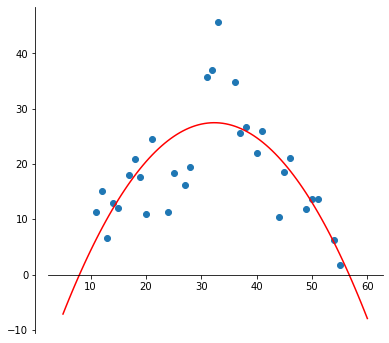


The quadratic equation is y = -20.967 + 2.996x - 0.046x^2


In [13]:
pr.plot_polynomial(xs, ys, xhat, degree=2, x_min=5, x_max=60)

print()
print(f'The quadratic equation is y = {xhat[0]:.3f}', end='')
if xhat[1] >= 0: 
    print(f' + {xhat[1]:.3f}x', end ='')
else:
    print(f' - {-xhat[1]:.3f}x', end ='')

if xhat[2] >= 0: 
    print(f' + {xhat[2]:.3f}x^2', end ='')
else:
    print(f' - {-xhat[2]:.3f}x^2')


<hr>

#### <strong>PROBLEM 2.</strong> If you have <em>n</em> points and you generate a least-squares polynomial of degree <em>n</em>-1, you've calculated the <u>interpolation</u> line that runs through all <em>n</em> points. This is also known as <u>polynomial curve fitting</u>.

#### Calculate and plot the interpolation line for these points: (-2, 3), (-1, 5), (0, 1), (1, 4), and (2, 10).

#### <strong>SOLUTION:</strong>

In [14]:
xs = [-2, -1, 0, 1, 2]
ys = [3, 5, 1, 4, 10]

In [15]:
A = np.array([[xs[i]**j for j in range(len(xs))] for i in range(len(xs))]) 
A

array([[ 1, -2,  4, -8, 16],
       [ 1, -1,  1, -1,  1],
       [ 1,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1],
       [ 1,  2,  4,  8, 16]])

In [16]:
b = np.array(ys)
b

array([ 3,  5,  1,  4, 10])

In [17]:
a = solve(A, b)
a

array([ 1.        , -1.25      ,  4.20833333,  0.75      , -0.70833333])

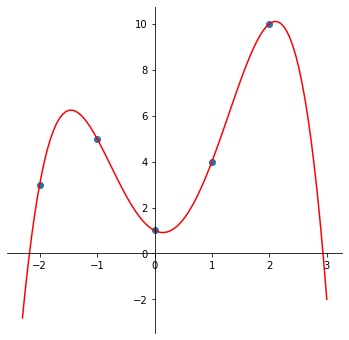

In [18]:
pr.plot_polynomial(xs, ys, a, degree=len(xs)-1, x_min=-2.3, x_max=3, y_axis_pos=0, size=(6, 6))

<hr>

#### <strong>PROBLEM 3.a.</strong> Amalgamated Widgets, Inc. ranks its employees by productivity: 1 (lowest), 2, 3, and 4 (highest). The following table shows for each rank, at the start of a new training program, the percentage of employees, the percentage productivity loss per employee, and the total percentage productivity loss.

<table>
    <tr><th>Rank</th><th>Employees</th><th>x</th><th>Productivity loss</th><th>=</th><th>Total loss</th></tr>
    <tr><td align=center>1</td><td align=center>30%</td><td></td><td align=center>40%</td><td></td><td align=center>12.00%</td></tr>
    <tr><td align=center>2</td><td align=center>35%</td><td></td><td align=center>25%</td><td></td><td align=center>&nbsp;8.75%</td></tr>
    <tr><td align=center>3</td><td align=center>25%</td><td></td><td align=center>15%</td><td></td><td align=center>&nbsp;3.75%</td></tr>
    <tr><td align=center>4</td><td align=center>10%</td><td></td><td align=center>&nbsp;5%</td><td></td><td align=center>&nbsp;0.50%</td></tr>
    <tr><th align=right colspan=5>Overall total</th><th align=center>25.00%</th></tr>
</table>

#### The training supervisor provided the following table that predicts what percentage of employees will move from one rank to another or stay in the same rank after each hourly training session, as determined by a test given at the end of the hour:

<table>
    <tr><th colspan=5 align=center>FROM:</th></tr>
    <tr><th>TO:</th><th>1</th><th>2</th><th>3</th><th>4</th></tr>
    <tr><th>1</th><td align=center>50%</td><td align=center>30%</td><td align=center>10%</td><td align=center>10%</td>
    <tr><th>2</th><td align=center>30%</td><td align=center>40%</td><td align=center>20%</td><td align=center>10%</td>
    <tr><th>3</th><td align=center>20%</td><td align=center>30%</td><td align=center>20%</td><td align=center>10%</td>
    <tr><th>4</th><td align=center>&nbsp;&nbsp;0%</td><td align=center>&nbsp;&nbsp;0%</td><td align=center>50%</td><td align=center>70%</td>
</table>

#### If training ends after two consecutive sessions with no rank changes to within three decimal places, how many hours will the training program last?

#### <strong>SOLUTION:</strong>

In [35]:
# Probability matrix.
P = np.array([[0.5, 0.3, 0.1, 0.1],
              [0.3, 0.4, 0.2, 0.1],
              [0.2, 0.3, 0.2, 0.1],
              [0.0, 0.0, 0.5, 0.7]])

P

array([[0.5, 0.3, 0.1, 0.1],
       [0.3, 0.4, 0.2, 0.1],
       [0.2, 0.3, 0.2, 0.1],
       [0. , 0. , 0.5, 0.7]])

In [36]:
# Initial state (percentage of employees in each rank).
X = np.array([0.30, 0.35, 0.25, 0.10])

X

array([0.3 , 0.35, 0.25, 0.1 ])

In [37]:
%precision 4
# for printing only

prev_X = np.zeros(len(X))
hour = 0

# Loop until the steady state is achieved.
# Limit 100 in case of nonconvergence.
for i in range(100):
    hour += 1
    
    prev_X = X    
    X = P@X
    
    print()
    print(f'After hour {hour}:')
    print(X)
    
    if (abs(X - prev_X) < 1.0e-4).all(): break

print()
print(f'Training lasts {hour} hours.')


After hour 1:
[0.29  0.29  0.225 0.195]

After hour 2:
[0.274  0.2675 0.2095 0.249 ]

After hour 3:
[0.2631 0.256  0.2019 0.2791]

After hour 4:
[0.2564 0.2496 0.1977 0.2963]

After hour 5:
[0.2525 0.2459 0.1953 0.3062]

After hour 6:
[0.2502 0.2438 0.194  0.312 ]

After hour 7:
[0.2488 0.2426 0.1932 0.3154]

After hour 8:
[0.2481 0.2419 0.1927 0.3174]

After hour 9:
[0.2476 0.2414 0.1924 0.3185]

After hour 10:
[0.2473 0.2412 0.1923 0.3192]

After hour 11:
[0.2472 0.2411 0.1922 0.3196]

After hour 12:
[0.2471 0.241  0.1921 0.3198]

After hour 13:
[0.247  0.2409 0.1921 0.3199]

After hour 14:
[0.247  0.2409 0.1921 0.32  ]

Training lasts 14 hours.


<hr>

#### <strong>PROBLEM 3.b.</strong> Compute directly (without iteration) the percentages of employees in each rank after all the training sessions have ended. Revise the first table in Problem 3.a to show the new percentage of employees in each rank. Assume the productivity loss of each rank hasn't changed, and include the new total loss percentage per rank and the overall total loss percentage. What percentage improvement resulted from the training?

In [22]:
%precision 3

A = P - np.identity(len(P))
A

array([[-0.5,  0.3,  0.1,  0.1],
       [ 0.3, -0.6,  0.2,  0.1],
       [ 0.2,  0.3, -0.8,  0.1],
       [ 0. ,  0. ,  0.5, -0.3]])

In [23]:
A = np.insert(A, len(P), 1, axis=0)
A

array([[-0.5,  0.3,  0.1,  0.1],
       [ 0.3, -0.6,  0.2,  0.1],
       [ 0.2,  0.3, -0.8,  0.1],
       [ 0. ,  0. ,  0.5, -0.3],
       [ 1. ,  1. ,  1. ,  1. ]])

In [24]:
b = np.append(np.zeros(len(P)), np.array([1]))
b

array([0., 0., 0., 0., 1.])

In [25]:
AT = A.T
AT

array([[-0.5,  0.3,  0.2,  0. ,  1. ],
       [ 0.3, -0.6,  0.3,  0. ,  1. ],
       [ 0.1,  0.2, -0.8,  0.5,  1. ],
       [ 0.1,  0.1,  0.1, -0.3,  1. ]])

In [26]:
ATA = AT@A
ATA

array([[1.38, 0.73, 0.85, 1.  ],
       [0.73, 1.54, 0.67, 1.  ],
       [0.85, 0.67, 1.94, 0.8 ],
       [1.  , 1.  , 0.8 , 1.12]])

In [27]:
ATAinv = inv(ATA)
ATAinv

array([[ 2.300e+00,  5.644e-01, -2.098e-01, -2.408e+00],
       [ 5.644e-01,  1.687e+00, -1.376e-03, -2.009e+00],
       [-2.098e-01, -1.376e-03,  7.515e-01, -3.482e-01],
       [-2.408e+00, -2.009e+00, -3.482e-01,  5.085e+00]])

In [28]:
ATb = AT@b
ATb

array([1., 1., 1., 1.])

In [29]:
print("The steady state:")

xhat = ATAinv@ATb
xhat

The steady state:


array([0.247, 0.241, 0.192, 0.32 ])

In [30]:
# Verify.
P@xhat

array([0.247, 0.241, 0.192, 0.32 ])

In [31]:
# Should equal what we calculated by iteration.
X

array([0.247, 0.241, 0.192, 0.319])

In [32]:
# Check that the percentages sum to 1.
np.sum(xhat)

0.9999999999999992

In [33]:
# Vector of losses per rank.
losses = np.array([0.40, 0.25, 0.15, 0.05])
losses

array([0.4 , 0.25, 0.15, 0.05])

In [39]:
print('Rank  Employees X Productivity Loss = Total Loss')

old_total  = 0.25
new_total = 0

for rank in range(4):
    rank_loss = xhat[rank]*losses[rank]
    new_total += rank_loss
    print(f'{rank+1:3d} {100*xhat[rank]:8.1f}% {100*losses[rank]:12.1f}% {100*rank_loss:16.2f}%')

print()
print(f'                       Overall total: {100*new_total:6.2f}%')
print(f'                         Improvement: {100*(old_total - new_total)/old_total: 6.2f}%')

Rank  Employees X Productivity Loss = Total Loss
  1     24.7%         40.0%             9.88%
  2     24.1%         25.0%             6.02%
  3     19.2%         15.0%             2.88%
  4     32.0%          5.0%             1.60%

                       Overall total:  20.38%
                         Improvement:  18.48%
